In [58]:
import Plots as plt
import Flux , Statistics ,DataFrames , OneHotArrays

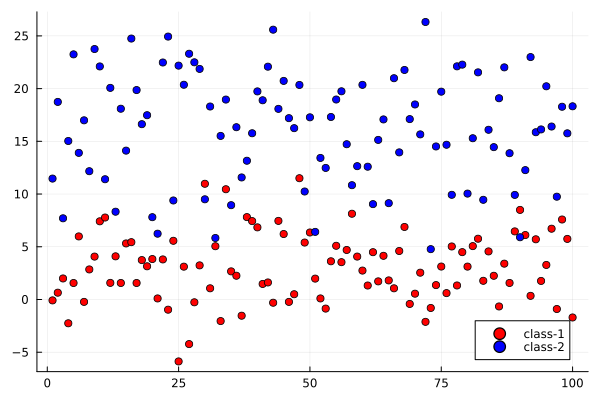

In [59]:
# Generate the Dataset
x1 = 3 .+ randn(100) .* 3;
x2 = 17 .+ randn(100) .* 5;
t = 1:100


plt.scatter(t,x1,color=:red,label="class-1")
plt.scatter!(t,x2,color=:blue,label="class-2")

In [60]:
X = [x1 ; x2]
Y = [ones(100) ; zeros(100)] # class-1 -> 1 and class-2 -> 0
println((X|>size , Y|>size))

((200,), (200,))


In [61]:
Yonehot = unique(Y) .== permutedims(Y) # One hot

2×200 BitMatrix:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1

In [52]:
# Note
[0.0 ; 1.0] .== [1.0 0.0 1.0 1.0 0.0]

2×5 BitMatrix:
 0  1  0  0  1
 1  0  1  1  0

In [63]:
W = rand(Float32,2,1);
b = Float32.([0,0]);

2-element Vector{Float32}:
 0.0
 0.0

In [65]:
# Build a model
train_step(w,b,x) = (w*x .+b) |> Flux.σ  # Softmax activation function


σ (generic function with 2 methods)